Importing all required modules

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



In [2]:
data=pd.read_csv('dataset.csv')

In [3]:
data.head()

,text_type,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...


In [4]:
data.groupby('text_type').describe().T

text_type                                                  ham  \
text count                                               14337   
     unique                                              14323   
     top     SPAM ALERT  🚔  User:     Username: @DillyBubbl...   
     freq                                                    8   

text_type                                                 spam  
text count                                                6011  
     unique                                               6011  
     top     naturally irresistible your corporate identity...  
     freq                                                    1

<Axes: xlabel='count', ylabel='text_type'>

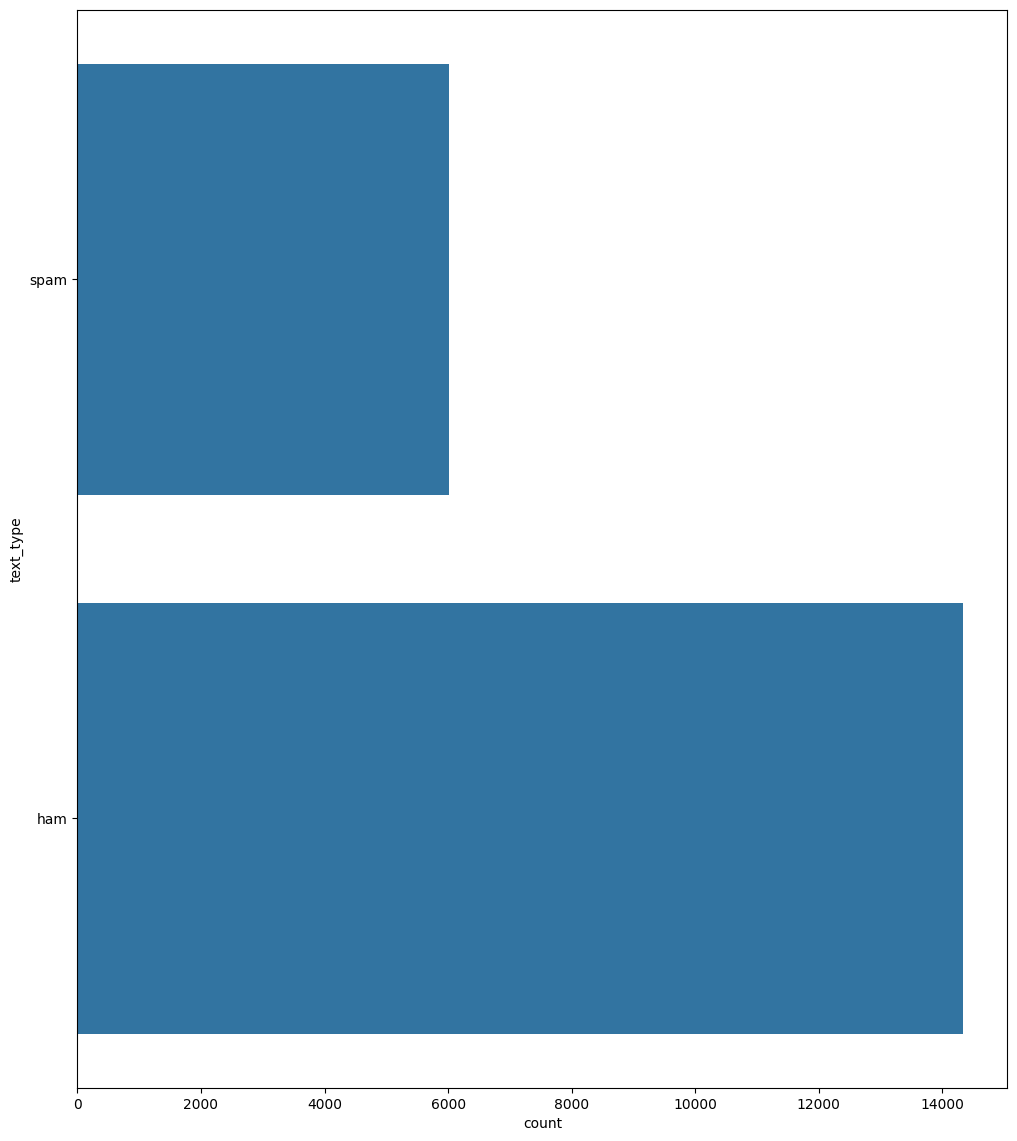

In [5]:
import seaborn as sns
plt.figure(figsize=(12,14))
sns.countplot(data['text_type'])

As data is imbalanced we need to make it balanced , will use downsample technique here (will randomly select ham_msg of lenth equal to spam msg

In [6]:
ham_msg = data[data.text_type =='ham']
spam_msg = data[data.text_type=='spam']

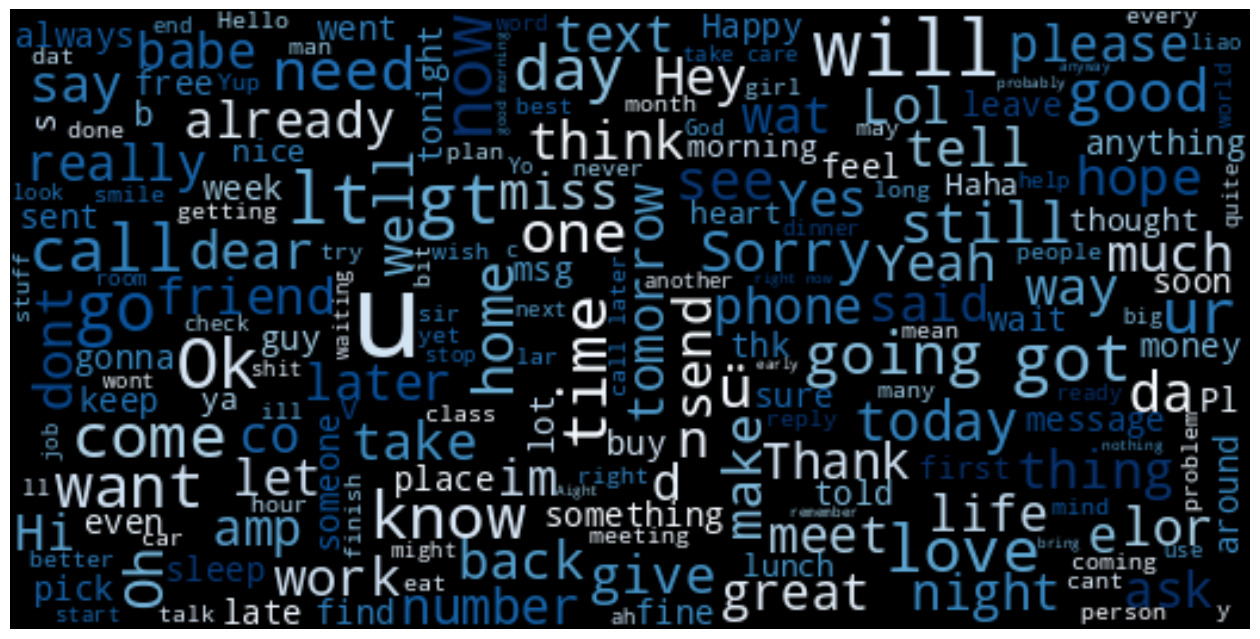

In [7]:
# Create numpy list to visualize using wordcloud
url = 'https://raw.githubusercontent.com/ShresthaSudip/SMS_Spam_Detection_DNN_LSTM_BiLSTM/master/SMSSpamCollection'
messages = pd.read_csv(url, sep ='\t',names=["label", "message"])
ham_msg_t = messages[messages.label =='ham']
spam_msg_t = messages[messages.label=='spam']
ham_msg_text = " ".join(ham_msg_t.message.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg_t.message.to_numpy().tolist())
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

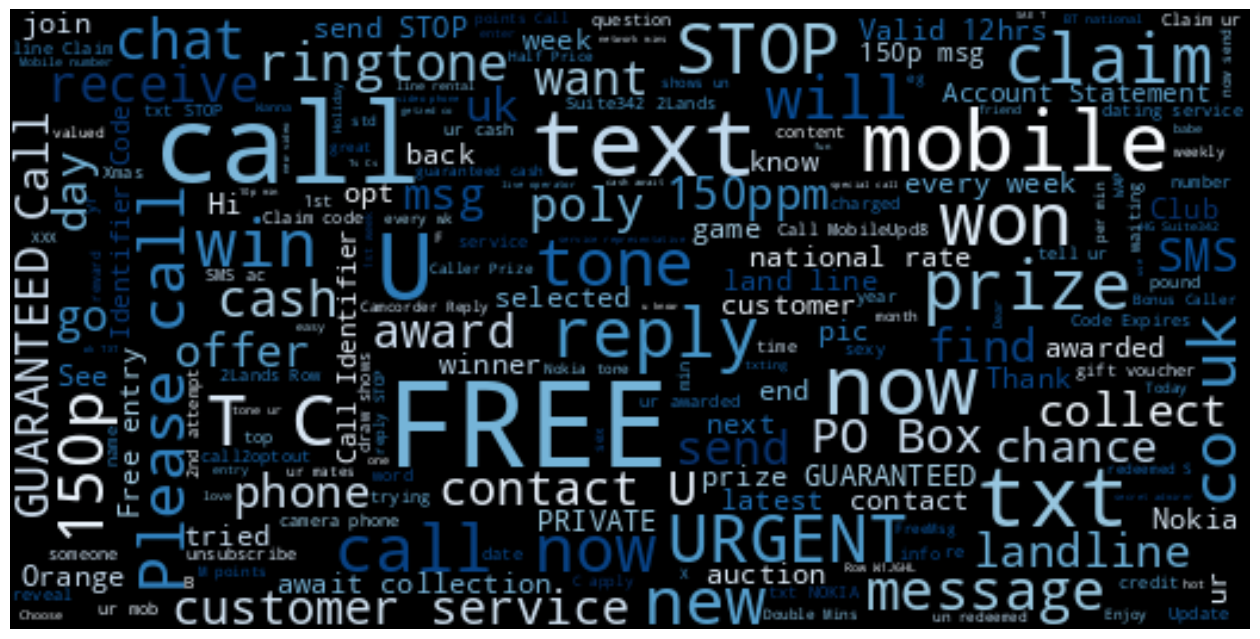

In [8]:
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

In [9]:
#randomly taking data from ham_ msg
ham_msg=ham_msg.sample(n=len(spam_msg),random_state=42)


In [10]:
print(ham_msg.shape,spam_msg.shape)

(6011, 2) (6011, 2)


Text(0.5, 0, 'Message types')

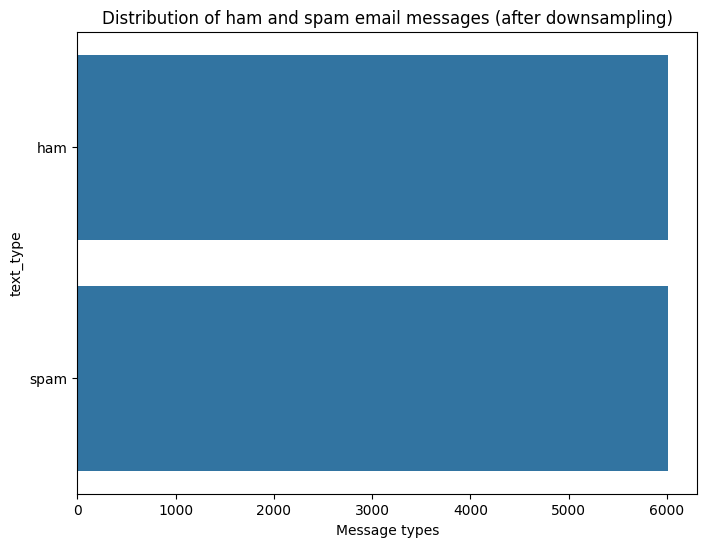

In [11]:
balanced_data = pd.concat([ham_msg, spam_msg]).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(balanced_data.text_type)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')


In [12]:
balanced_data.head()

,text_type,text
0,ham,url url date 1635465 1635465 1635465t1635465 1...
1,ham,edith terry scott i spoke briefly with edith t...
2,ham,i liked the new mobile
3,ham,new powermod 97 xls marty absolutely yes we ar...
4,ham,would me smoking you out help us work through ...


In [13]:
balanced_data['label']=balanced_data['text_type'].map({'ham':0,'spam':1})

In [14]:
train_msg, test_msg, train_labels, test_labels =train_test_split(balanced_data['text'],balanced_data['label'],test_size=0.2,random_state=434)

In [18]:
vocab_size=500
oov_tok='<OOV>'
max_len=50

In [16]:
#preprocessing making tokens out of text
token=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(train_msg)

In [19]:
word_index=token.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'the': 3,
 'and': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'of': 8,
 '1635465': 9,
 'for': 10,
 'in': 11,
 'is': 12,
 'your': 13,
 'on': 14,
 'this': 15,
 'it': 16,
 'with': 17,
 'that': 18,
 'have': 19,
 'we': 20,
 'from': 21,
 'be': 22,
 'are': 23,
 'my': 24,
 'ect': 25,
 'will': 26,
 'at': 27,
 's': 28,
 'enron': 29,
 'vince': 30,
 'me': 31,
 'url': 32,
 'if': 33,
 'can': 34,
 'or': 35,
 'not': 36,
 'by': 37,
 'as': 38,
 'all': 39,
 'our': 40,
 'am': 41,
 'get': 42,
 'now': 43,
 'com': 44,
 'please': 45,
 'free': 46,
 'just': 47,
 '2': 48,
 'an': 49,
 'no': 50,
 'but': 51,
 'do': 52,
 '1': 53,
 'more': 54,
 'hou': 55,
 't': 56,
 'so': 57,
 'was': 58,
 'kaminski': 59,
 'here': 60,
 'new': 61,
 'time': 62,
 'like': 63,
 'subject': 64,
 'has': 65,
 'would': 66,
 '2000': 67,
 'one': 68,
 'up': 69,
 'out': 70,
 'about': 71,
 'u': 72,
 'know': 73,
 'only': 74,
 'j': 75,
 'any': 76,
 'call': 77,
 'cc': 78,
 'pm': 79,
 'what': 80,
 '3': 81,
 'he': 82,
 'thanks': 83,
 'messag

In [20]:
padding_type='post'
truncate_type='post'
Trainning_seq=token.texts_to_sequences(train_msg)
Trainning_pad=pad_sequences(Trainning_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [21]:
Testing_seq=token.texts_to_sequences(test_msg)
Testing_pad=pad_sequences(Testing_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

Model: Simple Feed Forward neural Network

In [22]:
#model
import tensorflow as tf

vocab_size = 500

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 12),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',  # You can experiment with different optimizers
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 12)          6000      
                                                                 
 global_average_pooling1d (  (None, 12)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 32)                416       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6449 (25.19 KB)
Trainable params: 6449 (25.19 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

Model: FFNN with Convolution Layer

In [ ]:
import tensorflow as tf

vocab_size = 500

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=50),
    tf.keras.layers.Conv1D(16, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',  # You can experiment with different optimizers
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 16)            8000      
                                                                 
 conv1d_2 (Conv1D)           (None, 48, 16)            784       
                                                                 
 global_average_pooling1d_3  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 batch_normalization_2 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 32)               

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')

In [ ]:
epoch=30
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(Trainning_pad, train_labels ,validation_data=(Testing_pad, test_labels),epochs=epoch,verbose=2)

Epoch 1/30
301/301 - 2s - loss: 0.5970 - accuracy: 0.7127 - val_loss: 0.4309 - val_accuracy: 0.8407 - 2s/epoch - 6ms/step
Epoch 2/30
301/301 - 1s - loss: 0.3408 - accuracy: 0.8738 - val_loss: 0.2997 - val_accuracy: 0.8827 - 933ms/epoch - 3ms/step
Epoch 3/30
301/301 - 1s - loss: 0.2685 - accuracy: 0.9008 - val_loss: 0.2694 - val_accuracy: 0.9010 - 746ms/epoch - 2ms/step
Epoch 4/30
301/301 - 1s - loss: 0.2411 - accuracy: 0.9109 - val_loss: 0.2568 - val_accuracy: 0.8981 - 742ms/epoch - 2ms/step
Epoch 5/30
301/301 - 1s - loss: 0.2252 - accuracy: 0.9185 - val_loss: 0.2659 - val_accuracy: 0.8911 - 723ms/epoch - 2ms/step
Epoch 6/30
301/301 - 1s - loss: 0.2206 - accuracy: 0.9173 - val_loss: 0.2510 - val_accuracy: 0.8990 - 781ms/epoch - 3ms/step
Epoch 7/30
301/301 - 1s - loss: 0.2098 - accuracy: 0.9217 - val_loss: 0.2435 - val_accuracy: 0.9019 - 777ms/epoch - 3ms/step
Epoch 8/30
301/301 - 1s - loss: 0.2080 - accuracy: 0.9251 - val_loss: 0.2406 - val_accuracy: 0.9035 - 1s/epoch - 4ms/step
Epoch 

In [ ]:
model.save('my_model.h5')

In [ ]:
model.evaluate(Testing_pad, test_labels)

76/76 [==============================] - 0s 4ms/step - loss: 0.2477 - accuracy: 0.9156


[0.2477271556854248, 0.9155924916267395]

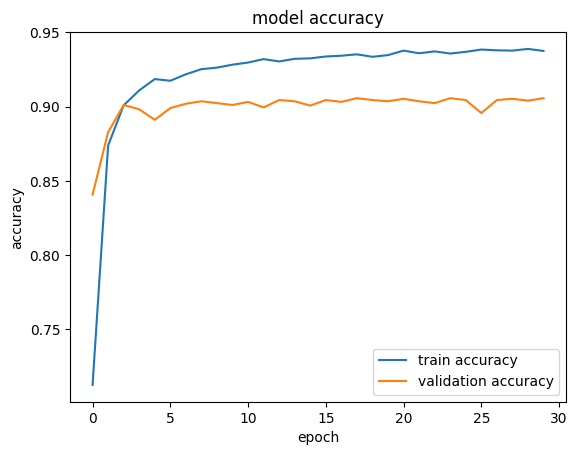

In [ ]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

In [ ]:
predict_msg = ["Pack you Bags!! You have won a free trip to London. Click on this link to know more",
          "Can we meet tomorror",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [ ]:
def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =50,
                      padding = padding_type,
                      truncating='post')
    return (model.predict(padded))
predict_spam(predict_msg)

1/1 [==============================] - 0s 108ms/step


array([[0.95193064],
       [0.02354978],
       [0.9856772 ]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


predictions = model.predict(Testing_pad)
predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Calculate metrics
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)
conf_matrix = confusion_matrix(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(conf_matrix)


76/76 [==============================] - 0s 1ms/step
Accuracy: 0.9056133056133057
Precision: 0.9117889530090684
Recall: 0.9021207177814029
F1 Score: 0.9069290692906928
[[1072  107]
 [ 120 1106]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(cm)
cr = classification_report(test_labels, predictions)
print("\nClassification Report:",)
print (cr)
acc = accuracy_score(test_labels,predictions)
print("\nAccuracy:",acc)

Confusion Matrix:
[[2756  101]
 [ 215  998]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2857
           1       0.91      0.82      0.86      1213

    accuracy                           0.92      4070
   macro avg       0.92      0.89      0.90      4070
weighted avg       0.92      0.92      0.92      4070


Accuracy: 0.9223587223587224


In [ ]:
train_msg, test_msg, train_labels, test_labels =train_test_split(balanced_data['Message'],balanced_data['label'],test_size=0.2,random_state=434)

**Results from Traditional ML Models**

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix


data_path = 'dataset.csv'
data = pd.read_csv(data_path)


label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['text_type'])


tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, max_features=1000)
X = tfidf_vectorizer.fit_transform(data['text'])
y = data['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_model = SVC(kernel='linear')
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=100)
nb_model = MultinomialNB()


svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)


svm_pred = svm_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
nb_pred = nb_model.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
nb_conf_matrix = confusion_matrix(y_test, nb_pred)


print("SVM Accuracy:", svm_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("SVM Confusion Matrix:\n", svm_conf_matrix)
print("Decision Tree Confusion Matrix:\n", dt_conf_matrix)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)
print("Naive Bayes Confusion Matrix:\n", nb_conf_matrix)


SVM Accuracy: 0.8906388206388206
Decision Tree Accuracy: 0.8931203931203932
Random Forest Accuracy: 0.9060442260442261
Naive Bayes Accuracy: 0.903931203931204
SVM Confusion Matrix:
 [[2775  138]
 [ 185  972]]
Decision Tree Confusion Matrix:
 [[2679  234]
 [ 207  950]]
Random Forest Confusion Matrix:
 [[2787  126]
 [ 168  989]]
Naive Bayes Confusion Matrix:
 [[2747  166]
 [ 225  932]]
